In [1]:
from qiskit import ClassicalRegister,QuantumRegister,Aer,execute,QuantumCircuit
from qiskit.visualization import plot_histogram

In [2]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')
qc = QuantumCircuit(q,c)

In [3]:
initial_state = [0,1]
qc.initialize(initial_state,0)

In [4]:
# Create entangled qubits
qc.h(1)
qc.cx(1, 2)

In [5]:
# Perform a Bell measurement
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure([0, 1], [0, 1])

In [6]:
# Apply Pauli-X and Pauli-Z gates based on the measurement results
qc.z(2).c_if(0, 1)
qc.x(2).c_if(1, 1)

In [7]:
# Measure the final qubit
qc.measure(2, 2)

In [8]:
# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

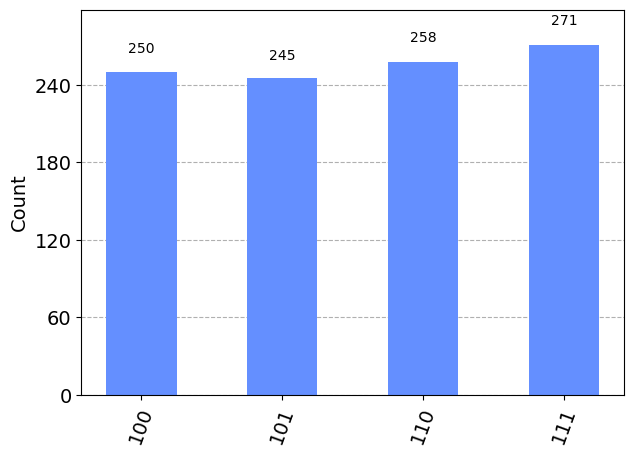

In [9]:
# Display the measurement results
plot_histogram(counts)

In [10]:
qc.draw()

┌─────────────────┐          ┌───┐ ░ ┌─┐                            
q_0: ┤ Initialize(0,1) ├───────■──┤ H ├─░─┤M├────────────────────────────
     └──────┬───┬──────┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐                         
q_1: ───────┤ H ├─────────■──┤ X ├──────░──╫─┤M├─────────────────────────
            └───┘       ┌─┴─┐└───┘      ░  ║ └╥┘   ┌───┐      ┌───┐   ┌─┐
q_2: ───────────────────┤ X ├───────────░──╫──╫────┤ Z ├──────┤ X ├───┤M├
                        └───┘           ░  ║  ║    └─╥─┘      └─╥─┘   └╥┘
                                           ║  ║ ┌────╨────┐┌────╨────┐ ║ 
c: 3/══════════════════════════════════════╩══╩═╡ c_0=0x1 ╞╡ c_1=0x1 ╞═╩═
                                           0  1 └─────────┘└─────────┘ 2